In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.dpi'] = 400
plt.style.use('fivethirtyeight')

In [73]:
pd.set_option('display.max_rows', 150)

In [4]:
carpet_data = pd.read_csv('Nikita_Delay_OutDet.csv', sep=';', index_col=False, header=None, skipinitialspace=True, 
                          names=['Year', 'Day', 'ms', 'T1', 'T2', 'T3', 'T4', 'phi', 'theta', 'RA', 'Dec'])

In [5]:
carpet_data

,Year,Day,ms,T1,T2,T3,T4,phi,theta,RA,Dec
0,2018,97,525840,-9.834915,39.166443,-40.832207,-13.859268,19.4,29.2,185.28,15.41
1,2018,97,1361979,-13.375580,-18.626411,13.451889,-13.406105,199.2,10.2,204.00,52.93
2,2018,97,1564765,-14.375580,-38.626410,4.451889,-15.406105,196.0,15.2,207.10,57.81
3,2018,97,1676739,-56.375580,-56.626410,27.451889,32.593895,241.1,39.6,257.82,48.88
4,2018,97,2947956,20.217910,-1.473930,-22.141708,-47.314842,92.1,20.2,177.93,40.86
...,...,...,...,...,...,...,...,...,...,...,...
243611,2024,225,85464888,-20.949432,47.398857,-21.309830,11.512817,357.0,28.8,317.05,14.65
243612,2024,225,85742753,-3.949432,6.398857,-14.309830,-26.487183,56.5,9.6,306.60,37.65
243613,2024,225,85846019,-6.949432,-14.601143,-8.309830,-12.487183,162.5,2.8,315.94,46.08
243614,2024,225,85889370,4.050568,-0.601143,-11.309830,-24.487183,84.9,8.7,305.63,42.04


In [6]:
t1 = np.array(carpet_data['T1'])
t2 = np.array(carpet_data['T2'])
t3 = np.array(carpet_data['T3'])
t4 = np.array(carpet_data['T4'])

time_delay_array = np.array([[t1[i], t2[i], t3[i], t4[i]] for i in range(len(t1))])

In [7]:
time_delay_array

array([[ -9.834915 ,  39.166443 , -40.832207 , -13.859268 ],
       [-13.37558  , -18.626411 ,  13.451889 , -13.406105 ],
       [-14.37558  , -38.62641  ,   4.451889 , -15.406105 ],
       ...,
       [ -6.9494324, -14.601143 ,  -8.30983  , -12.487183 ],
       [  4.0505676,  -0.6011429, -11.30983  , -24.487183 ],
       [ 26.050568 , -30.601143 ,  -0.3098297, -34.487183 ]])

In [78]:
x = np.array([-21.29, -21.63, 17.5, 21.16])
y = np.array([21.68, -21.13, 9.34, -21.05])
z = 1700

c_norm = 0.3

x_sq = x**2
y_sq = y**2
xy = x*y

x_mean = x.mean()
y_mean = y.mean()
x_mean_sq = x_mean**2
y_mean_sq = y_mean**2
x_sq_mean = x_sq.mean()
y_sq_mean = y_sq.mean()
xy_mean = xy.mean()
xy_mean_sq = xy_mean**2

def get_PFA_theta(t):
    
    t_mean = t.mean()
    xt_mean = (x*t).mean()
    yt_mean = (y*t).mean()

    xt_dif = xt_mean - x_mean*t_mean
    x2t_dif = x_sq_mean*t_mean - x_mean*xt_mean
    x2x_dif = x_mean_sq - x_sq_mean

    yt_dif = yt_mean - y_mean*t_mean
    y2t_dif = y_sq_mean*t_mean - y_mean*yt_mean
    y2y_dif = y_mean_sq - y_sq_mean

    nx = (xy_mean*yt_dif+x_mean*y2t_dif+xt_mean*y2y_dif)/(x_sq_mean*y_mean_sq+x_mean_sq*y_sq_mean-2*x_mean*y_mean*xy_mean+xy_mean_sq-x_sq_mean*y_sq_mean)*c_norm
    ny = (xy_mean*xt_dif+y_mean*x2t_dif+yt_mean*x2x_dif)/(x_sq_mean*y_mean_sq+x_mean_sq*y_sq_mean-2*x_mean*y_mean*xy_mean+xy_mean_sq-x_sq_mean*y_sq_mean)*c_norm

    nz = np.sqrt(1-nx**2-ny**2)

    theta = np.degrees(np.arccos(nz))
    phi = (1 - np.sign(nx))*np.pi/2 + (1 + np.sign(nx))*(1 - np.sign(ny))*np.pi/2 + np.arctan(ny/nx)
    phi_moved = 242 - np.degrees(phi)
    if phi_moved < 0:
        phi_moved += 360
    
    if np.isnan(theta):
        return (-1, -1)
    else:
        return (theta, phi_moved)

In [79]:
PFA_angles=[]

bug_filter = []

for i, time_delay in enumerate(time_delay_array):
    angles = get_PFA_theta(time_delay)
    PFA_angles.append(angles)
    if (not np.all(time_delay)) | (angles == (-1, -1)):
        bug_filter.append(i)

/tmp/ipykernel_32284/3095873986.py:37: RuntimeWarning: invalid value encountered in sqrt
  nz = np.sqrt(1-nx**2-ny**2)


In [77]:
carpet_data.iloc[bug_filter]

,Year,Day,ms,T1,T2,T3,T4,phi,theta,RA,Dec
1961,2018,114,31001386,-90.152100,95.855900,9.192795,58.160110,329.4,10.6,345.54,34.09
3383,2018,129,49123555,-80.811730,96.184364,-24.957657,27.194786,344.4,22.0,75.78,22.03
3437,2018,130,66517,-86.839250,96.538510,3.332214,54.971200,331.9,35.4,241.70,10.90
3663,2018,132,28469135,-32.651720,4.996101,-23.803772,0.000000,338.0,14.9,352.56,29.41
4895,2018,149,80758256,-52.990845,0.000000,-25.901405,8.189438,320.3,21.5,236.50,25.76
5677,2018,157,23156152,58.949640,96.716060,-23.925545,-90.176640,62.1,23.3,324.90,29.79
5827,2018,158,57485392,-98.526310,96.776310,-2.962845,62.667183,330.3,10.2,139.17,34.38
6135,2018,161,31880828,-30.015045,97.054720,-63.232560,-38.584130,18.6,25.5,20.70,18.90
6228,2018,162,27874539,-81.942220,97.094154,-18.706848,39.669754,340.6,11.9,17.93,32.09
6238,2018,162,35400046,-72.521280,97.663826,-3.956032,61.575890,335.0,29.4,57.20,16.00


In [65]:
carpet_theta = np.array(carpet_data['theta'])
carpet_phi = np.array(carpet_data['phi'])

In [70]:
phi_diff = []

for i, angle in enumerate(PFA_angles):
    difference = np.abs(angle[1] - carpet_phi[i])
    if difference > 1:
        print(difference)
    phi_diff.append(difference)
phi_diff = np.array(phi_diff)

5.659092500062041
1.2597875814383315
1.2136908888470828
1.4282370272349567
1.043595216759627
1.226724065492391
1.2966821914347975
1.239876843426714
2.8746339948110062
2.177161599216163
1.053715530143819
1.1021615600564871
1.9527084380242172
2.5242118162999816
1.0134281612748168
1.8516188209141546
1.6489097751270947
5.769796543188937
2.4258350123466244
1.6432920379777443
2.0182670923266812
2.4983202450607394
1.0333993108668835
3.2611103408416966
1.8607030617537532
1.4055527627956508
1.7635099355603927
3.931004497614893
7.481609432008241
1.5729258119413032
1.2240581671218465
1.016243197307631
1.4906624591230244
1.3523001813244377
1.218179778173095
1.3955592405285415
2.312845042047769
1.2068186877406504
1.932181262932744
1.2229043983550412
1.3616884789738606
1.036861072454542
1.4670844883686982
2.404309646116303
1.7862485479493202
2.163642073859336
3.4037924341259895
1.2143832153606695
1.849637708637374
1.4868214647309514
7.252201291256398
1.140604200483267
1.2147677688461656
2.1534061859

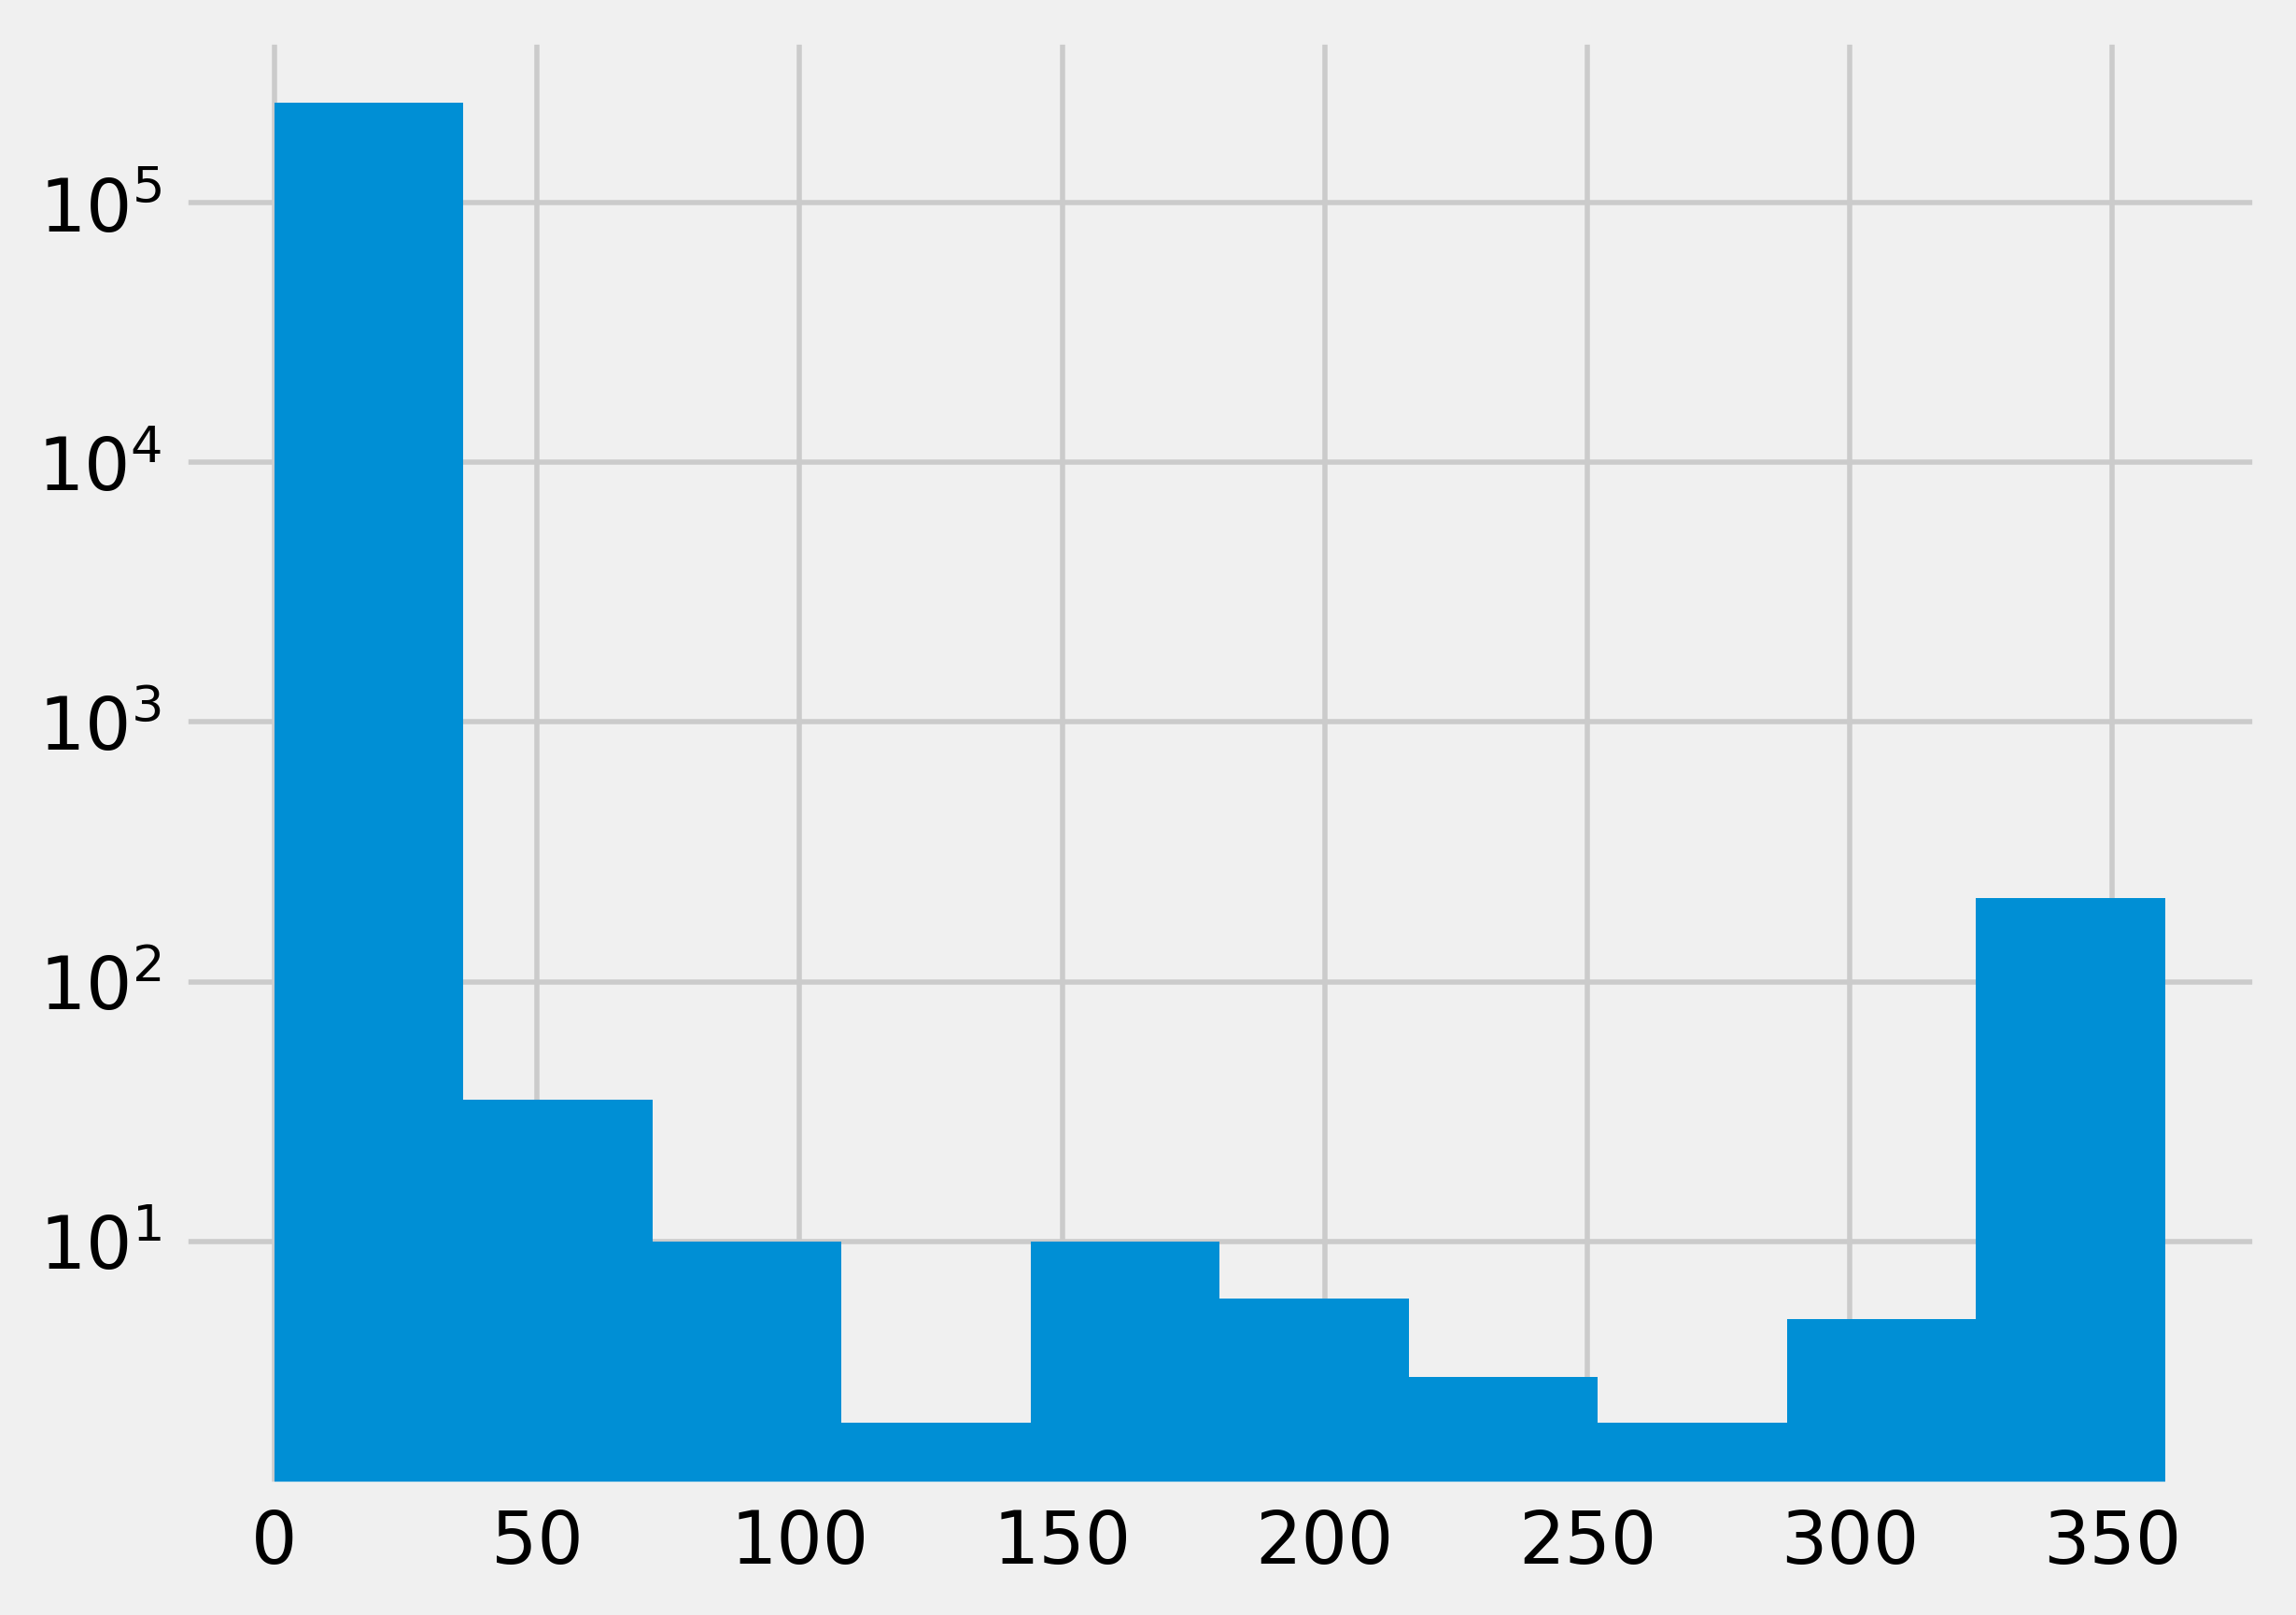

In [71]:
plt.hist(phi_diff)

plt.yscale('log')

In [21]:
diff = []

for i, angle in enumerate(PFA_angles):
    difference = np.abs(angle[0] - carpet_theta[i])
    if difference > 1:
        print(difference)
    diff.append(difference)
diff = np.array(diff)

1.9732374020737176
11.6
53.55123905023296
1.0055550784197962
1.056656421846391
23.0
36.4
24.3
11.2
1.0274670609874192
1.234327298069978
1.1385643836671804
1.0032112313528216
26.5
1.0564072415675945
1.1561037811422459
12.9
30.4
1.096958025760486
1.0861865330871368
1.1000865068964671
1.1629628923874336
1.2809782946394073
1.098582118819202
1.0462789643077812
14.5
12.1
13.5
12.5
7.6
17.9
37.3
35.0
8.7
25.4
10.9
45.881346570589024
32.7
11.6
30.4
1.0835543976452762
1.030291976537626
34.7
34.3
16.0
15.7
23.3
10.9
22.0
21.2
1.011380646426474
1.0872956997656544
1.0642555752956184
11.2
1.0463662700254517
35.5
1.0119620944997578
23.6
71.64043963587444
1.168519194019126
23.4
1.000201337449468
1.058379706926587
1.1119038637045406
1.0111782277833896
1.282295082876871
1.2317256446848148
2.7
1.1320466012432675
40.7
1.075330431761138
34.1
20.8
22.7
63.752755691186984
31.7
1.0698628727388382
38.2
52.275268898128964
24.3
36.9
25.2
1.062707645511594
10.6
39.8
31.1
24.9
19.8
11.8
40.5
15.5
23.9
6.5
24.9
17

In [64]:
filt = (diff > 1)

print(len(diff[filt]) / len(diff))

0.0011124064100880074


In [66]:
diff.mean()

0.07694169926862927

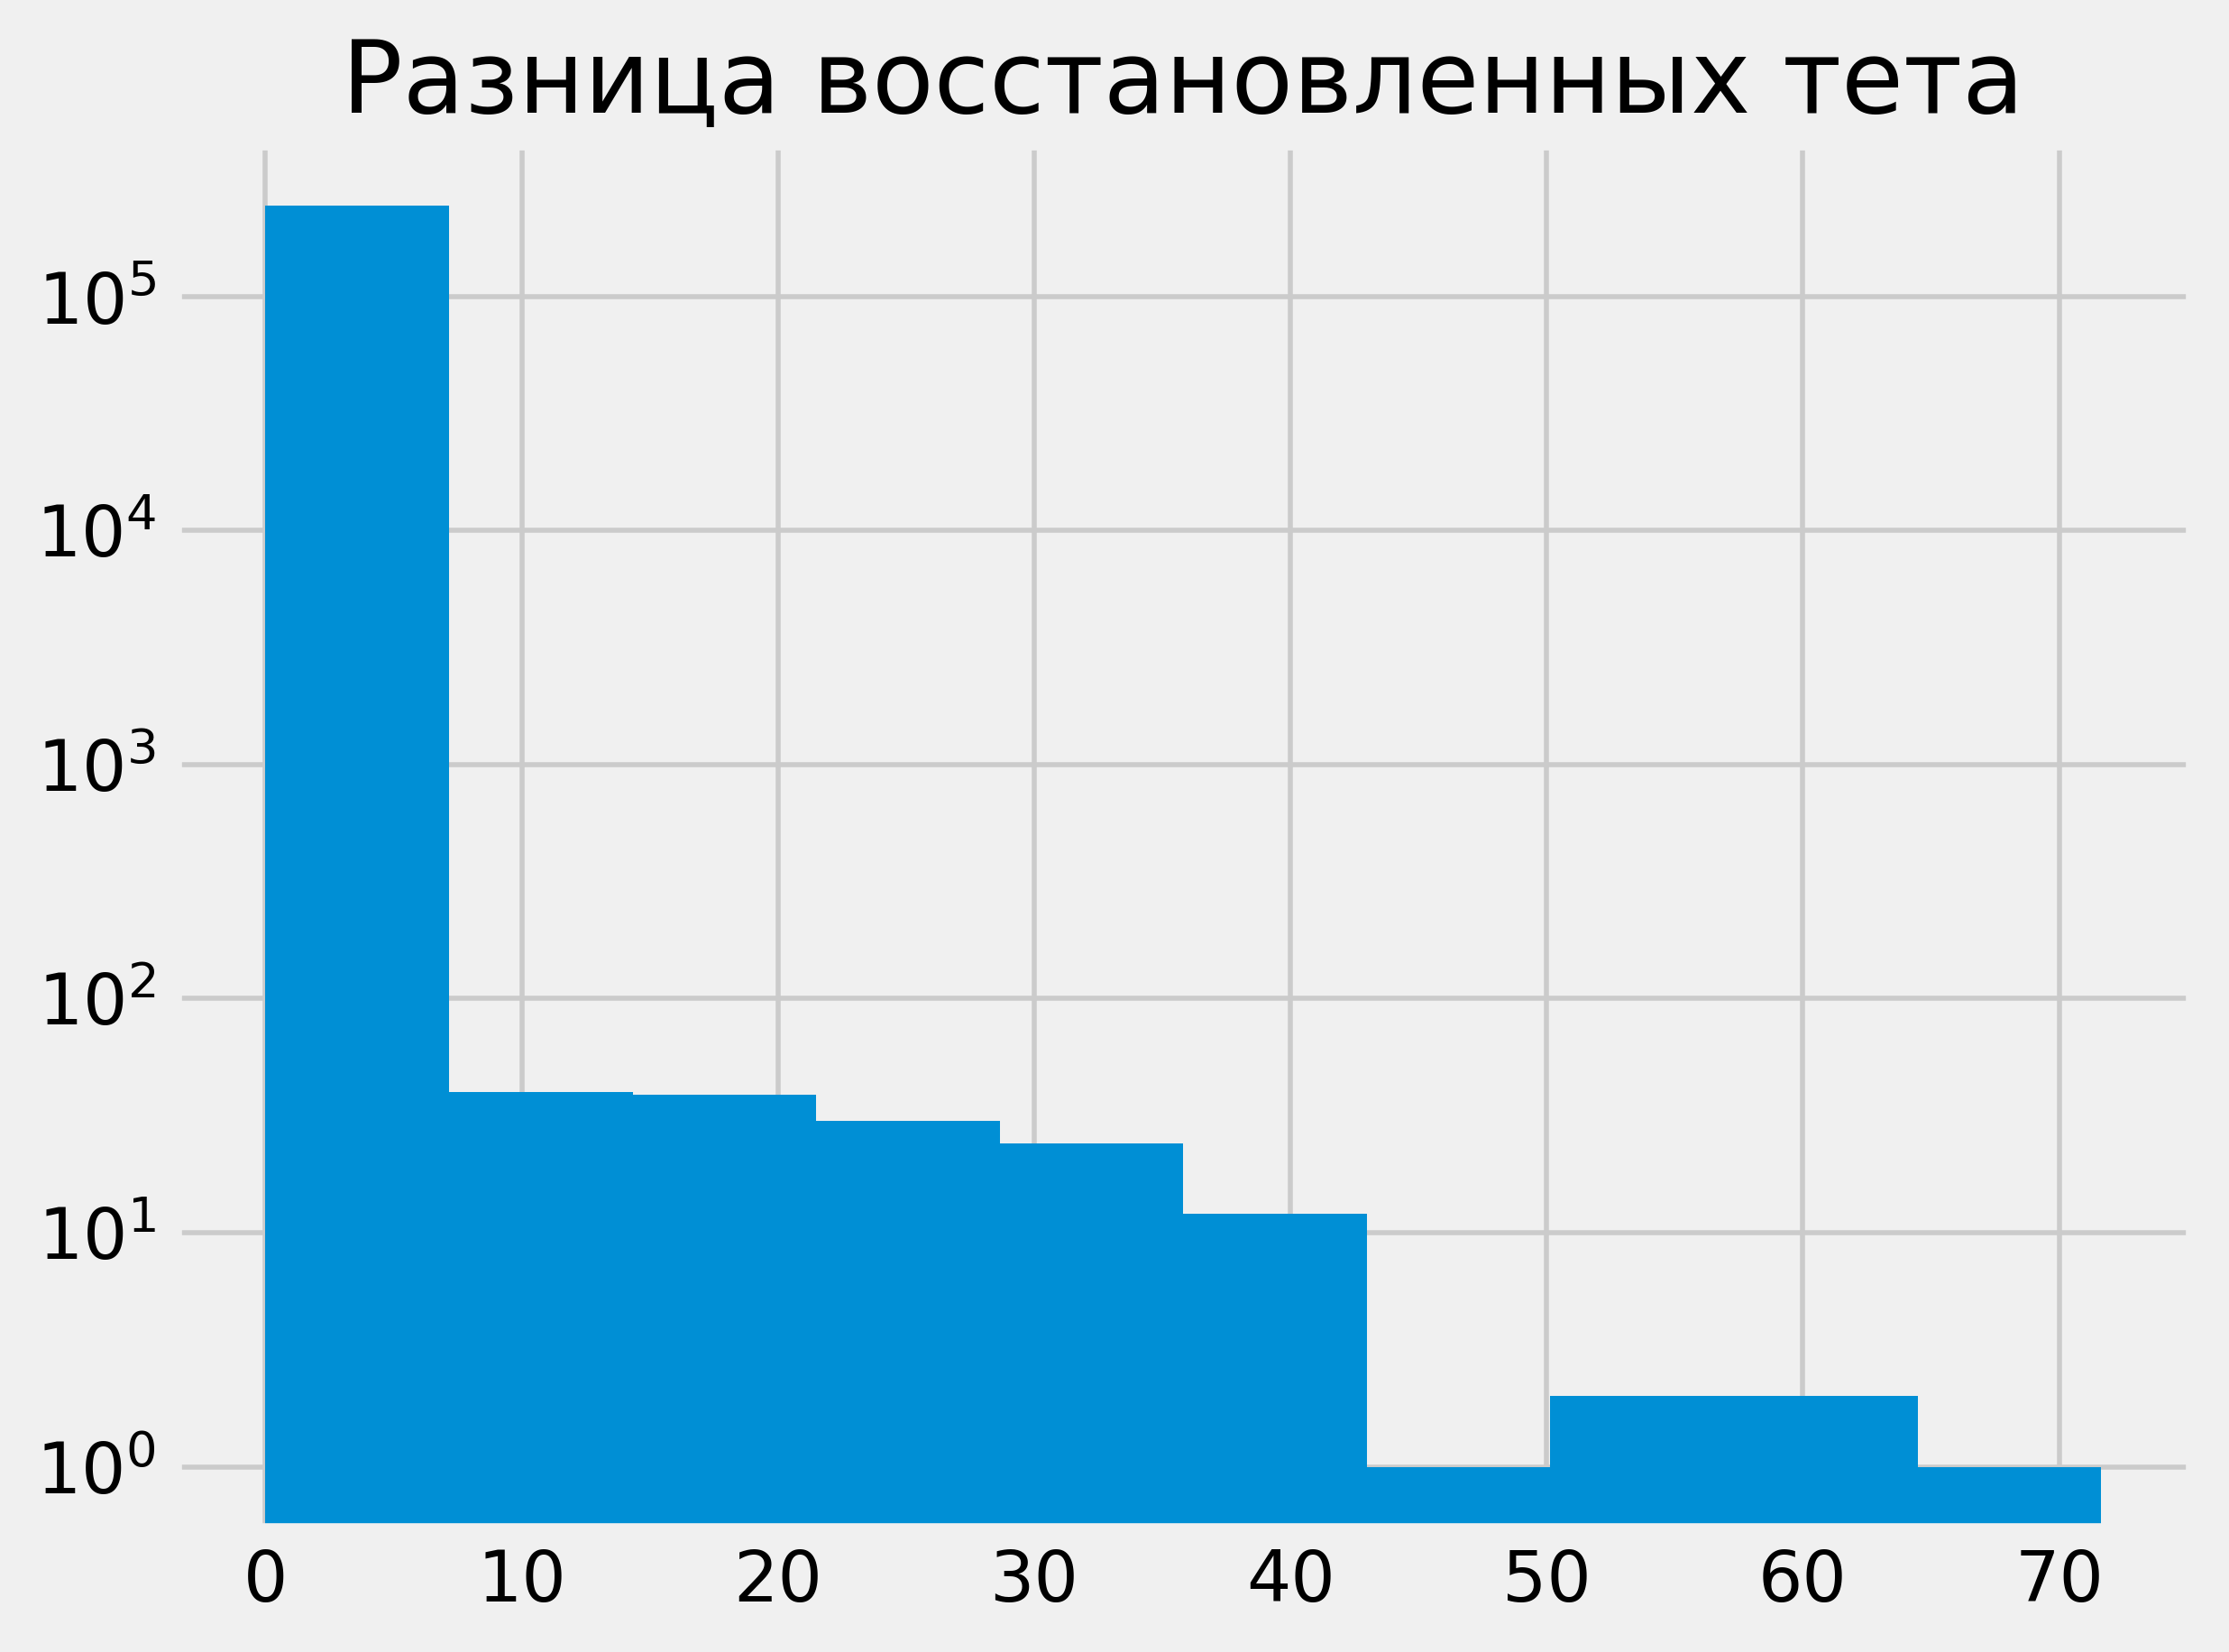

In [65]:
plt.hist(diff)

plt.yscale('log')

plt.title('Разница восстановленных тета')
plt.tight_layout()

plt.savefig('difference.png')